## Digital Assignment-1<br>CSE4020-Machine Learning<br>



#### Activation Functions
In artificial neural networks, the activation function of a node defines the output of that node, or "neuron," given an input or set of inputs. This output is then used as input for the next node and so on until a desired solution to the original problem is found.The Activation functions discussed in this notebook are<br><br>
<li>Linear
<li>Binary
<li>ELU
<li>Tanh
<li>RELU
<li>Leaky RELU
<li>Sigmoid
<li>Gaussian
<li>Softplus
<li>Softmax
<li>ArcTan</li><br>
Activation functions are really important for a Artificial Neural Network to learn and make sense of something really complicated and Non-linear complex functional mappings between the inputs and response variable.They introduce non-linear properties to our Network.Their main purpose is to convert a input signal of a node in a A-NN to an output signal. That output signal now is used as a input in the next layer in the stack.<br><br>
If we do not apply a Activation function then the output signal would simply be a simple linear function.A linear function is just a polynomial of one degree.A Neural Network without Activation function would simply be a Linear regression Model, which has limited power and does not performs good most of the times.<br><br>
Also another important feature of a Activation function is that it should be differentiable. We need it to be this way so as to perform backpropogation optimization strategy while propogating backwards in the network to compute gradients of Error(loss) with respect to Weights and then accordingly optimize weights using Gradient descend or any other Optimization technique to reduce Error<br>

#### Importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### 1. Linear Activation Function
A straight line function where activation is proportional to input ( which is the weighted sum from neuron ).<br><br>
<b>Pros:</b>
<li>It gives a range of activations, so it is not binary activation.
<li>We can definitely connect a few neurons together and if more than 1 fires, we could take the max ( or softmax) and decide based on that.</li><br>
<b>Cons:</b>
<li>For this function, derivative is a constant. That means, the gradient has no relationship with X.
<li>It is a constant gradient and the descent is going to be on constant gradient.
<li>If there is an error in prediction, the changes made by back propagation is constant and not depending on the change in input delta(x) </li>
<br><b>Range:</b>&nbsp;&nbsp;&nbsp;(-infty ,infty)<br>


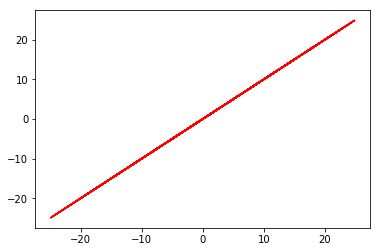

In [2]:
x=[]
y=[]
for i in range(0,100):
    r = np.random.uniform(low=-25,high=25)                     
    x.append(r)
y=x
plt.plot(x,y,c='red')

### 2. Binary Activation Function
If the value Y is above a given threshold value then activate the neuron else leave it deactivated.


The binary function is extremely simple. It can be used while creating a binary classifier. When we simply need to say yes or no for a single class, step function would be the best choice, as it would either activate the neuron or leave it to zero.

The function is more theoretical than practical since in most cases we would be classifying the data into multiple classes than just a single class. The step function would not be able to do that.

Moreover, the gradient of the step function is zero. This makes the step function not so useful since during back-propagation when the gradients of the activation functions are sent for error calculations to improve and optimize the results. The gradient of the step function reduces it all to zero and improvement of the models doesn’t really happen.


<br><b>Range:</b>&nbsp;&nbsp;&nbsp;{0,1}<br>

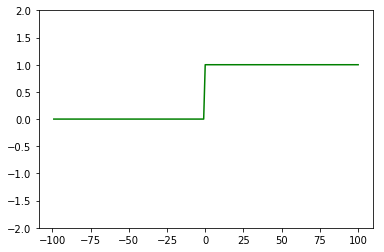

In [3]:
x=[]
y=[]
for i in range(0,1000):
    r = np.random.uniform(low=-100,high=100)                     
    x.append(math.ceil(r))
x=sorted(x)
for j in range(0,1000):
    if x[j]>=0:
        y.append(1)
    else:
        y.append(0)
plt.plot(x,y,c='green')
plt.ylim(-2,2)
plt.show()

### 3. ELU Activation Function
Exponential Linear Unit or its widely known name ELU is a function that tend to converge cost to zero faster and produce more accurate results. Different to other activation functions, ELU has a extra alpha constant which should be positive number.<br>

ELU is very similiar to RELU except negative inputs. They are both in identity function form for non-negative inputs. On the other hand, ELU becomes smooth slowly until its output equal to -α whereas RELU sharply smoothes.<br><br>
<b>Pros:</b><br>
<li>ELU becomes smooth slowly until its output equal to -α whereas RELU sharply smoothes.
<li>ELU is a strong alternative to ReLU.
<li>Unlike to ReLU, ELU can produce negative outputs.</li><br>
<b>Cons:</b><br>
<li>For x > 0, it can blow up the activation with the output range of [0, inf].</li><br>

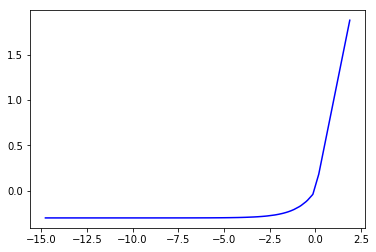

In [4]:
x=[]
y=[]
alpha=0.3
for i in range(0,100):
    r = np.random.uniform(low=-15,high=2)                     
    x.append(r)
x=sorted(x)
for j in range(0,100):
    y.append(np.where(x[j] > 0, x[j],alpha*(math.exp(x[j])-1)))
    
plt.plot(x,y,c='blue')
plt.show()

### 4. tanh Activation Function
Tanh squashes a real-valued number to the range [-1, 1]. It’s non-linear. But unlike Sigmoid, its output is zero-centered. Therefore, in practice the tanh non-linearity is always preferred to the sigmoid nonlinearity. <br><br>
<b>Pros:</b><br>
<li>The gradient is stronger for tanh than sigmoid ( derivatives are steeper).</li><br>
<b>Cons:</b><br>
<li>Tanh also has the vanishing gradient problem.</li>

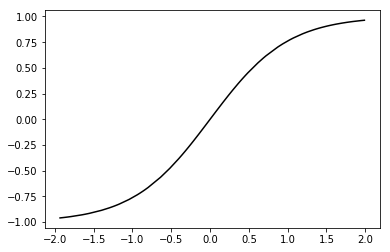

In [5]:
x=[]
y=[]
for i in range(0,100):
    r = np.random.uniform(low=-2,high=2)                     
    x.append(r)
x=sorted(x)
for j in range(0,100):
    value=(math.exp(x[j])-math.exp(-(x[j])))/(math.exp(x[j])+math.exp(-(x[j])))
    y.append(value)
    
plt.plot(x,y,c='black')
plt.show()

### 5. ReLu Activation Function
A recent invention which stands for Rectified Linear Units. The formula is deceptively simple: max(0,z). Despite its name and appearance, it’s not linear and provides the same benefits as Sigmoid but with better performance.
ReLu is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations.
<br><br>
<b>Pros:</b><br>
<li>It avoids and rectifies vanishing gradient problem.<li>
ReLu is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations.
</li><br>
<b>Cons:</b><br>
<li>One of its limitation is that it should only be used within Hidden layers of a Neural Network Model.<li>
Some gradients can be fragile during training and can die. It can cause a weight update which will makes it never activate on any data point again. Simply &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;saying that ReLu could result in Dead Neurons.<li>
In another words, For activations in the region x less than 0 of ReLu, gradient will be 0 because of which the weights will not get adjusted during descent. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;That means, those neurons which go into that state will stop responding to variations in error/ input ( simply because gradient is 0, nothing changes ). This &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;is called dying ReLu problem.
The range of ReLu is [0, inf] . This means it can blow up the activation.
<li>ReLu is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations.</li><br>


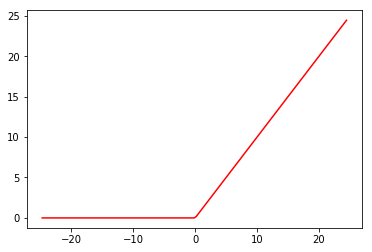

In [6]:
x=[]
y=[]
alpha=0.1
for i in range(0,100):
    r = np.random.uniform(low=-25,high=25)                     
    x.append(r)
x=sorted(x)
for j in range(0,100):
    y.append(np.where(x[j] > 0, x[j], 0))

plt.plot(x,y,c='red')
plt.show()

### 6. Leaky Relu Activation Function
LeakyRelu is a variant of ReLU. Instead of being 0 when z<0, a leaky ReLU allows a small, non-zero, constant gradient α (Normally, α=0.01). However, the consistency of the benefit across tasks is presently unclear.<br><br>
<b>Pros:</b><br>
<li>Leaky ReLUs are one attempt to fix the “dying ReLU” problem by having a small negative slope (of 0.01, or so).</li><br>
<b>Cons:</b><br>
<li>As it possess linearity, it can’t be used for the complex Classification. It lags behind the Sigmoid and Tanh for some of the use cases.</li><br>

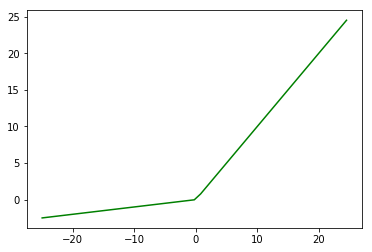

In [7]:
x=[]
y=[]
alpha=0.1
for i in range(0,100):
    r = np.random.uniform(low=-25,high=25)                     
    x.append(r)
x=sorted(x)
for j in range(0,100):
    y.append(np.where(x[j] > 0, x[j], x[j] * alpha))

plt.plot(x,y,c='green')
plt.show()

### 7. Sigmoid Activation Function
Sigmoid takes a real value as input and outputs another value between 0 and 1. It’s easy to work with and has all the nice properties of activation functions: it’s non-linear, continuously differentiable, monotonic, and has a fixed output range.<br><br>
<b>Pros:</b><br>
<li>It is nonlinear in nature. Combinations of this function are also nonlinear!
<li>It will give an analog activation unlike step function.
<li>It has a smooth gradient too.
<li>It’s good for a classifier.
<li>The output of the activation function is always going to be in range (0,1) compared to (-inf, inf) of linear function. So we have our activations bound in a &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;range. Nice, it won’t blow up the activations then.</li><br>
<b>Cons:</b><br>
<li>Towards either end of the sigmoid function, the Y values tend to respond very less to changes in X.
<li>It gives rise to a problem of “vanishing gradients”.
<li>Its output isn’t zero centered. It makes the gradient updates go too far in different directions. 0 < output < 1, and it makes optimization harder.
<li>Sigmoids saturate and kill gradients.
<li>The network refuses to learn further or is drastically slow ( depending on use case and until gradient /computation gets hit by floating point value limits ).<br>

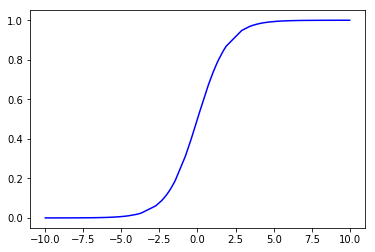

In [8]:
x=[]
y=[]
for i in range(0,100):
    r = np.random.uniform(low=-10,high=10)                     
    x.append(r)
x=sorted(x)
for j in range(0,100):
    value=1/(1+math.exp(-(x[j])))
    y.append(value)
    
plt.plot(x,y,c='blue')
plt.show()

### 8. Gaussian Activation Function
Gaussian functions are bell-shaped curves that are continuous. The node output (high/low) is interpreted in terms of class membership (1/0), depending on how close the net input is to a chosen value of average. <br>

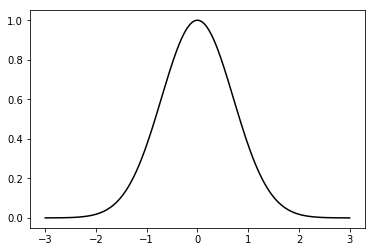

In [9]:
x=[]
y=[]
for i in range(0,1000):
    r = np.random.uniform(low=-3,high=3)                     
    x.append(r)
x=sorted(x)
for j in range(0,1000):
    value=math.exp(-(x[j]**2))
    y.append(value)
    
plt.plot(x,y,c='black')
plt.show()

### 9. Softplus Activation Function

Also known as the softplus unit, this activation function also overcomes the “Dying ReLU” problem by making itself differentiable everywhere and causes less saturation overall.<br>

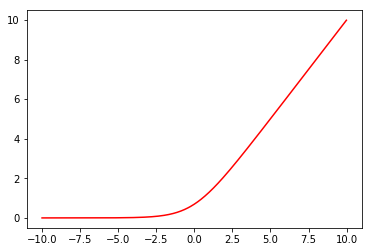

In [10]:
x=[]
y=[]
for i in range(0,1000):
    r = np.random.uniform(low=-10,high=10)                     
    x.append(r)
x=sorted(x)
for j in range(0,1000):
    value=math.log(1+math.exp(x[j]))
    y.append(value)
    
plt.plot(x,y,c='red')
plt.show()

### 10. Softmax Activation Function
Softmax function calculates the probabilities distribution of the event over ‘n’ different events. In general way of saying, this function will calculate the probabilities of each target class over all possible target classes. Later the calculated probabilities will be helpful for determining the target class for the given inputs.

The softmax function is also a type of sigmoid function but is handy when we are trying to handle classification problems. The sigmoid function as we saw earlier was able to handle just two classes. What shall we do when we are trying to handle multiple classes. Just classifying yes or no for a single class would not help then. The softmax function would squeeze the outputs for each class between 0 and 1 and would also divide by the sum of the outputs. This essentially gives the probability of the input being in a particular class. 



Let’s say for example we have the outputs as-

[1.2 , 0.9 , 0.75], When we apply the softmax function we would get [0.42 ,  0.31, 0.27]. So now we can use these as probabilities for the value to be in each class.
The softmax function is ideally used in the output layer of the classifier where we are actually trying to attain the probabilities to define the class of each input.<br>

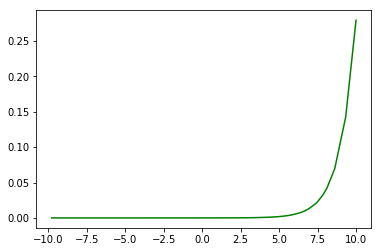

In [11]:
x=[]
y=[]
for i in range(0,100):
    r = np.random.uniform(low=-10,high=10)                     
    x.append(r)
x=sorted(x)
y=np.exp(x) / float(sum(np.exp(x)))
plt.plot(x,y,c='green')
plt.show()

### 11. ArcTan Activation Function
Activation functions that have a bit flatter S shape have better discriminatory power.
The ArcTan Activation Function returns a value between -1.57 and +1.57 and is flatter than log-sigmoid or tanh.<br><br>This activation function maps the input values in the range (−π/2,π/2). Its derivative converges quadratically against zero for large input values. On the other hand, in the sigmoid activation function, the derivative converges exponentially against zero, which can cause problems during back-propagation.<br>


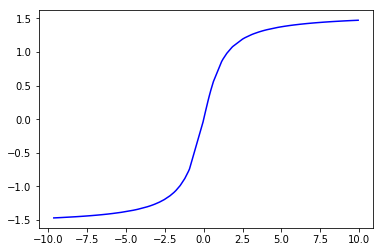

In [12]:
x=[]
y=[]
for i in range(0,100):
    r = np.random.uniform(low=-10,high=10)                     
    x.append(r)
x=sorted(x)
y=np.arctan(x)
plt.plot(x,y,c='blue')
plt.show()

## Choosing the Right Activation Function
Depending upon the properties of the problem we might be able to make a better choice for easy and quicker convergence of the network.<br><br>
<li>Sigmoid functions and their combinations generally work better in the case of classifiers
<li>Sigmoids and tanh functions are sometimes avoided due to the vanishing gradient problem
<li>ReLU function is a general activation function and is used in most cases these days
<li>If we encounter a case of dead neurons in our networks the leaky ReLU function is the best choice
<li>Always keep in mind that ReLU function should only be used in the hidden layers
<li>One can begin with using ReLU function and then move over to other activation functions in case ReLU doesn’t provide with optimum results